In [1]:
import os
import json
from sklearn.model_selection import train_test_split
from lib.train import trainer

In [2]:
def root(name):
    return "-".join(name.split("/")[-1].split(".")[-2].split("-")[:-2 or None])

root_path_landcover = 'datasets/landcover_processed/rotated_crops/'
list_dataset_landcover = list(filter(lambda x: x.endswith('.png'), os.listdir(root_path_landcover)))
list_dataset_landcover = list(map(lambda x: root_path_landcover + x, list_dataset_landcover))
# list_dataset_landcover = list_dataset_landcover[7000:10000]
list_dataset_landcover = list_dataset_landcover

root_path_sentinel = 'datasets/sentinel_processed/rotated_crops/'
list_dataset_sentinel = list(filter(lambda x: x.endswith('.png'), os.listdir(root_path_sentinel)))
list_dataset_sentinel = list(map(lambda x: root_path_sentinel + x, list_dataset_sentinel))
# list_dataset_sentinel = list_dataset_sentinel[7000:10000]
list_dataset_sentinel = list_dataset_sentinel

list_dataset = list_dataset_landcover + list_dataset_sentinel
#list_dataset = list_dataset[7000:7500]
list_dataset = list_dataset

list_root = [root(name) for name in list_dataset]
list_root = list(set(list_root))

train_root_list, test_root_list = train_test_split(list_root, test_size=0.15)

train_img_list = []
test_img_list = []
for name in list_dataset:
    rname = root(name)
    if rname in test_root_list and name.endswith('-0.png'):
        test_img_list.append(name)
    elif rname in train_root_list:
        train_img_list.append(name)
        
print(len(train_img_list), len(test_img_list))
# with open('train_img_list_landcover.json', 'w') as f:
with open('train_img_list_total.json', 'w') as f:
    json.dump(train_img_list, f)
    
# with open('test_img_list_landcover.json', 'w') as f:
with open('test_img_list_total.json', 'w') as f:
    json.dump(test_img_list, f)

106820 2435


In [3]:
kappa = 1/(95898/3443)
kappa / (1 + kappa)

0.03465839884841103

In [4]:
cfg = {
    "from_scratch_landcover": {
        "use_pretrained_vgg": False,
        "pretrained_model": None,
        "train_img_list": "train_img_list_landcover.json",
        "test_img_list": "test_img_list_landcover.json",
        "batch_size": 40,
        "num_epochs": 9,
        "lr": 0.0001
    },
    "from_scratch_sentinel": {
        "use_pretrained_vgg": False,
        "pretrained_model": None,
        "train_img_list": "train_img_list_sentinel.json",
        "test_img_list": "test_img_list_sentinel.json",
        "batch_size": 40,
        "num_epochs": 20,
        "lr": 0.0001
},
    "vgg_sentinel": {
        "use_pretrained_vgg": True,
        "pretrained_model": None,
        "train_img_list": "train_img_list_sentinel.json",
        "test_img_list": "test_img_list_sentinel.json",
        "batch_size": 40,
        "num_epochs": 20,
        "lr": 0.0001
    }
    "from_scratch_total": {
        "use_pretrained_vgg": False,
        "pretrained_model": None,
        "train_img_list": "train_img_list_total.json",
        "test_img_list": "test_img_list_total.json",
        "batch_size": 80,
        "num_epochs": 20,
        "lr": 0.0001
}
}

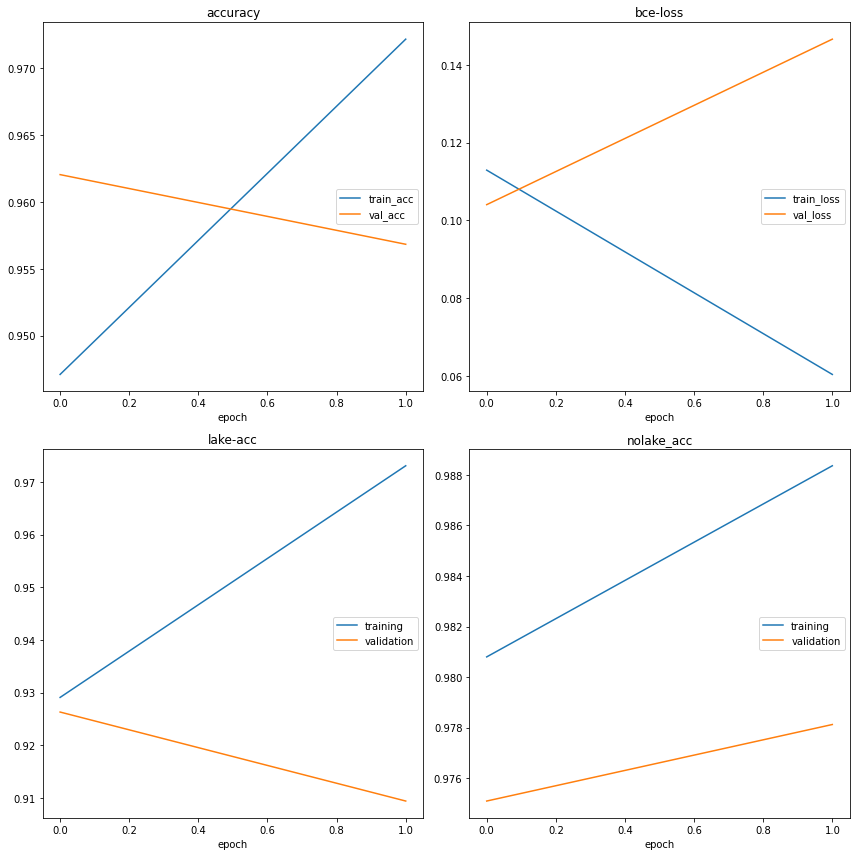

accuracy
	train_acc        	 (min:    0.947, max:    0.972, cur:    0.972)
	val_acc          	 (min:    0.957, max:    0.962, cur:    0.957)
bce-loss
	train_loss       	 (min:    0.060, max:    0.113, cur:    0.060)
	val_loss         	 (min:    0.104, max:    0.147, cur:    0.147)
lake-acc
	training         	 (min:    0.929, max:    0.973, cur:    0.973)
	validation       	 (min:    0.909, max:    0.926, cur:    0.909)
nolake_acc
	training         	 (min:    0.981, max:    0.988, cur:    0.988)
	validation       	 (min:    0.975, max:    0.978, cur:    0.978)
train step
eval step


RuntimeError: CUDA out of memory. Tried to allocate 246.00 MiB (GPU 0; 10.76 GiB total capacity; 8.79 GiB already allocated; 74.56 MiB free; 9.09 GiB reserved in total by PyTorch)

In [5]:
bs = cfg['from_scratch_total']['batch_size']
ne = cfg['from_scratch_total']['num_epochs']
lr = cfg['from_scratch_total']['lr']
bs, ne, lr

trainer(cfg['from_scratch_total'], train_id=f'from_scratch_total_nofreeze_bs{bs}_ne{ne}_lr{lr}')

In [ ]:
#import matplotlib.pylab as plt

#with open('history-from_scratch_landcover_bs30_ne3_lr0.0001.json', 'r') as f:
#    history_dict = json.load(f)

#plt.plot(history_dict['val_loss'])
#plt.show()